ID3

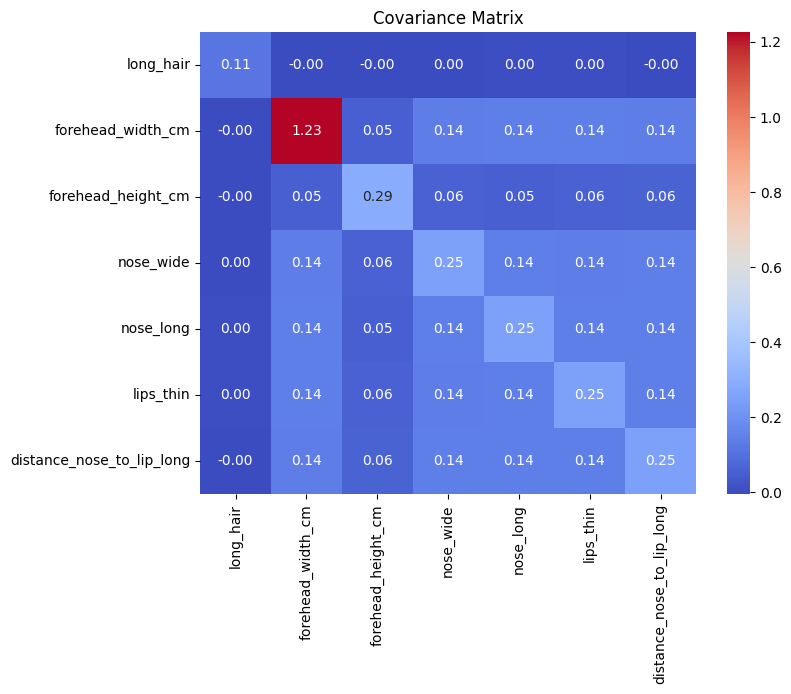

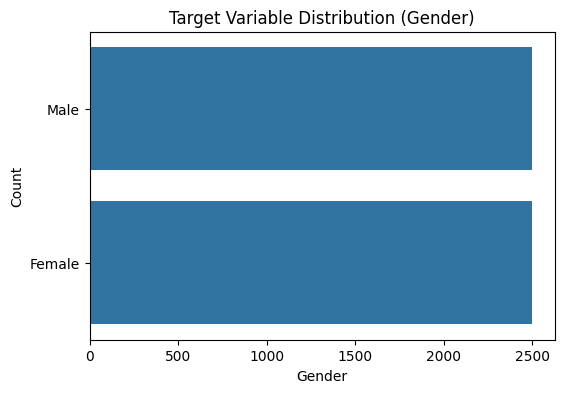

ID3 Accuracy: 95.70%
ID3 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       502
           1       0.97      0.94      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

ID3 Confusion Matrix:
 [[490  12]
 [ 31 468]]


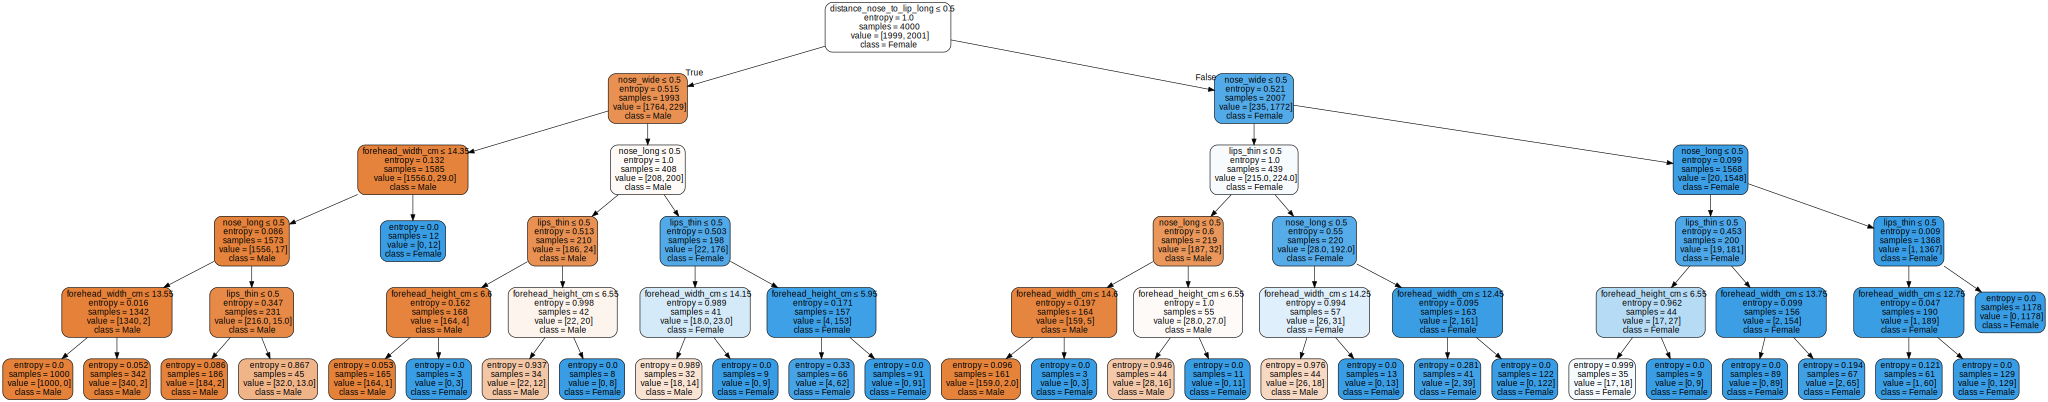

In [3]:
import graphviz
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz


# Load the dataset
data = pd.read_csv("/content/gender_classification_v7 (1) (1).csv")

# Convert categorical columns to numerical if necessary (e.g., 'Gender' column)
if 'Gender' in data.columns:
    data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})  # Convert Male to 1, Female to 0

# Display the covariance matrix (excluding any remaining non-numeric columns)
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.cov(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Covariance Matrix")
plt.show()


# Target variable distribution chart (assuming 'gender' is the target variable)
plt.figure(figsize=(6, 4))
sns.countplot(data['gender'])
plt.title("Target Variable Distribution (Gender)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()




# Encode the target variable
data['gender'] = LabelEncoder().fit_transform(data['gender'])

# Separate features and target variable
X = data.drop('gender', axis=1)
y = data['gender']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the ID3 model (using Entropy for Information Gain)
id3_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
id3_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_id3 = id3_tree.predict(X_test)

# Evaluate the model
accuracy_id3 = accuracy_score(y_test, y_pred_id3)
report_id3 = classification_report(y_test, y_pred_id3)
conf_matrix_id3 = confusion_matrix(y_test, y_pred_id3)

print(f"ID3 Accuracy: {accuracy_id3 * 100:.2f}%")
print("ID3 Classification Report:\n", report_id3)
print("ID3 Confusion Matrix:\n", conf_matrix_id3)

# Visualize the ID3 Decision Tree
dot_data_id3 = export_graphviz(id3_tree, out_file=None,
                               feature_names=X.columns,
                               class_names=['Male', 'Female'],
                               filled=True, rounded=True,
                               special_characters=True)
graph_id3 = graphviz.Source(dot_data_id3)
graph_id3.render("id3_tree")  # Saves the tree as a PDF file named 'id3_tree'

# Display the ID3 tree inline (for Jupyter or IPython environments)
graph_id3